In [9]:
import zipfile
import pandas as pd


In [13]:
with zipfile.ZipFile("Healthcare_dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("healthcare_data")  # Extract into this folder


In [23]:
#load the data
df = pd.read_excel("healthcare_data/Dataset/data.xlsx")
#Check the data
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [27]:
#Inspect the data
print(df.shape)

(303, 14)


In [29]:
#Displays info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [33]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]


In [35]:
# Summary statistics (central tendency, spread)
summary_stats = df.describe()


In [37]:
# Number of duplicates
num_duplicates = duplicate_rows.shape[0]

duplicate_rows.head(), num_duplicates, summary_stats

(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 164   38    1   2       138   175    0        1      173      0      0.0   
 
      slope  ca  thal  target  
 164      2   4     2       1  ,
 1,
               age         sex          cp    trestbps        chol         fbs  \
 count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
 mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
 std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
 min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
 25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
 50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
 75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
 max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   
 
           restecg     thalach     

In [41]:
# Remove duplicate rows from the DataFrame
df_cleaned = df.drop_duplicates()


In [43]:
# Confirm that no duplicates remain
remaining_duplicates = df_cleaned.duplicated().sum()
df_cleaned.shape, remaining_duplicates


((302, 14), 0)

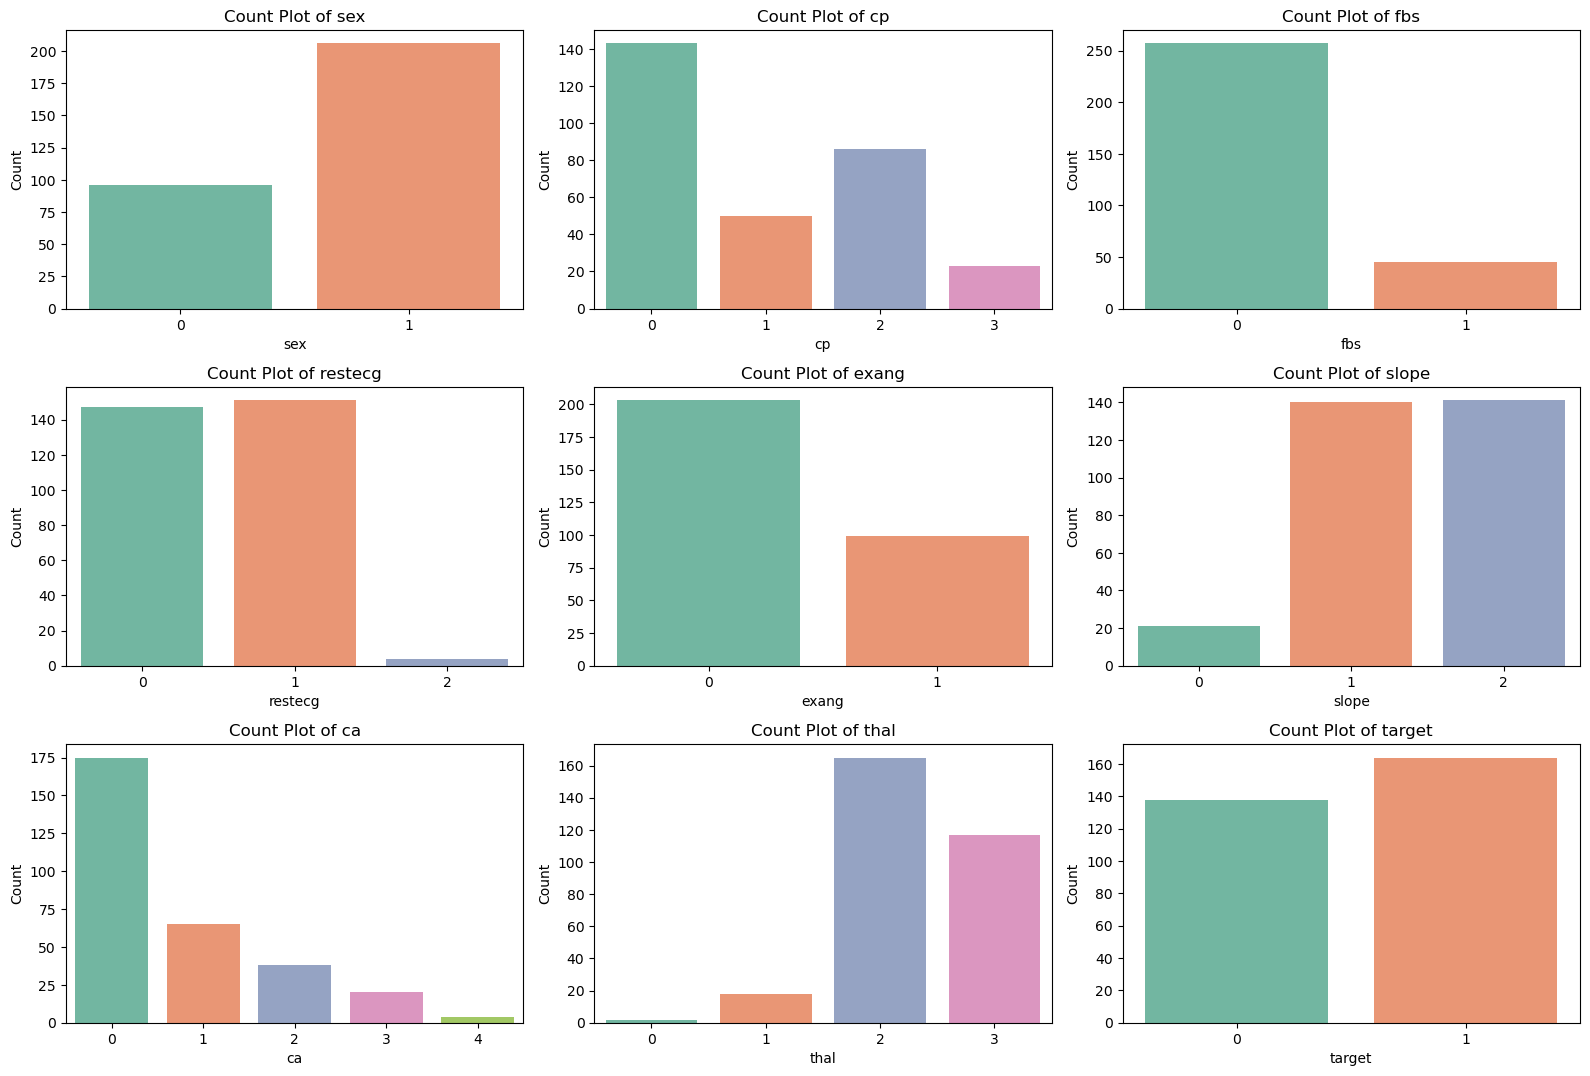

In [60]:

import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suppress future warnings from seaborn
warnings.filterwarnings("ignore", category=FutureWarning)

# List of categorical columns
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

# Plot count plots
plt.figure(figsize=(16, 14))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(4, 3, i)
    sns.countplot(data=df_cleaned, x=col, hue=col, palette='Set2', legend=False)
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()



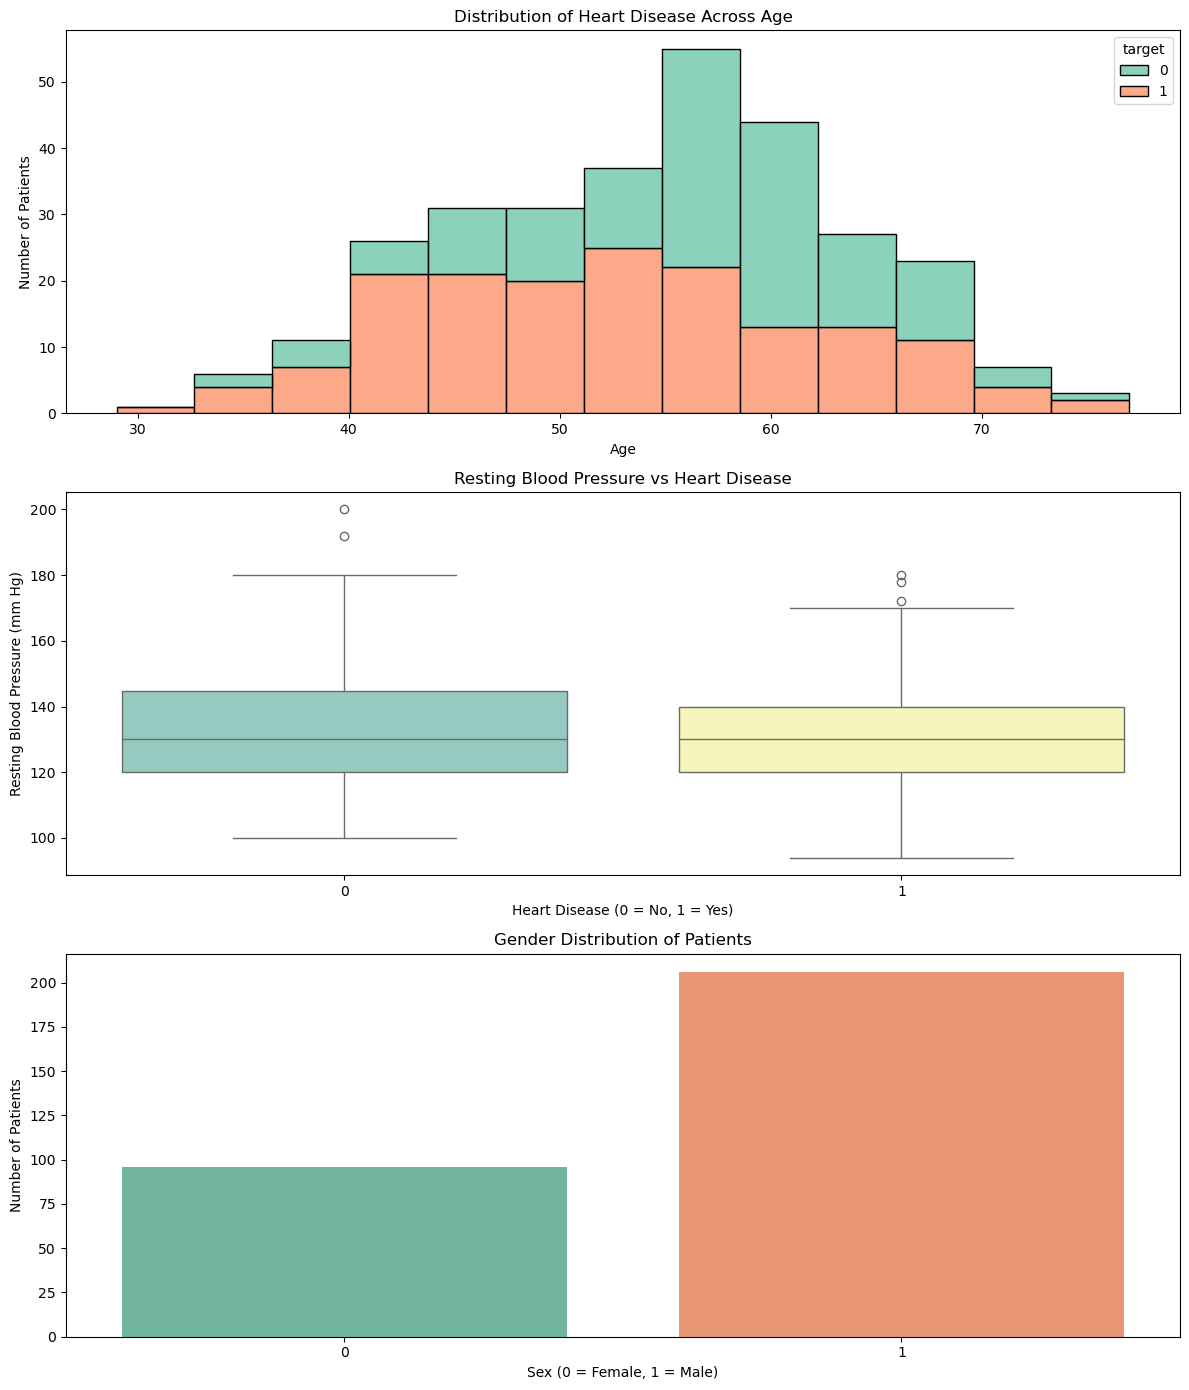

In [64]:
# Set up the visual layout
fig, axes = plt.subplots(3, 1, figsize=(12, 14))

# 5. Occurrence of CVD across different ages
sns.histplot(data=df_cleaned, x='age', hue='target', multiple='stack', kde=False, ax=axes[0], palette='Set2')
axes[0].set_title('Distribution of Heart Disease Across Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Number of Patients')

# 6. Heart disease vs. resting blood pressure
sns.boxplot(data=df_cleaned, x='target', y='trestbps', palette='Set3', ax=axes[1])
axes[1].set_title('Resting Blood Pressure vs Heart Disease')
axes[1].set_xlabel('Heart Disease (0 = No, 1 = Yes)')
axes[1].set_ylabel('Resting Blood Pressure (mm Hg)')

# 7. Composition by gender
sns.countplot(data=df_cleaned, x='sex', palette='Set2', ax=axes[2])
axes[2].set_title('Gender Distribution of Patients')
axes[2].set_xlabel('Sex (0 = Female, 1 = Male)')
axes[2].set_ylabel('Number of Patients')

plt.tight_layout()
plt.show()


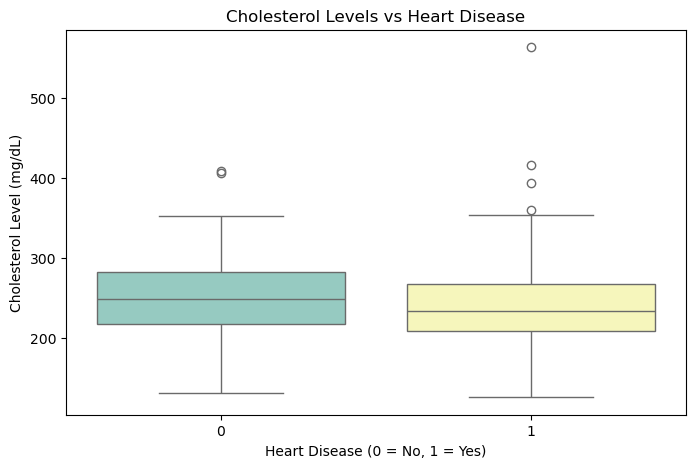

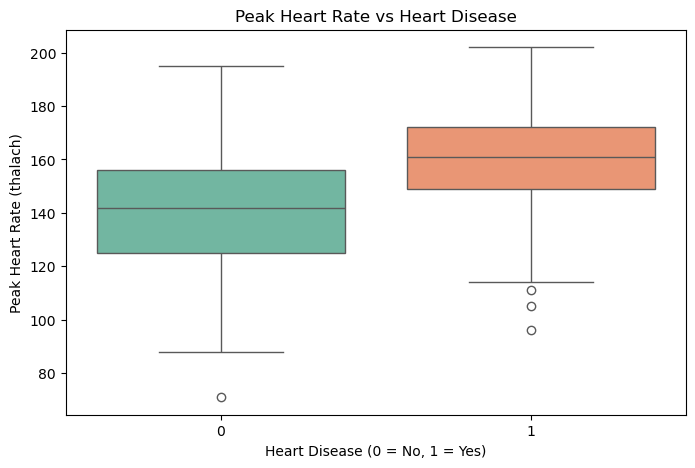

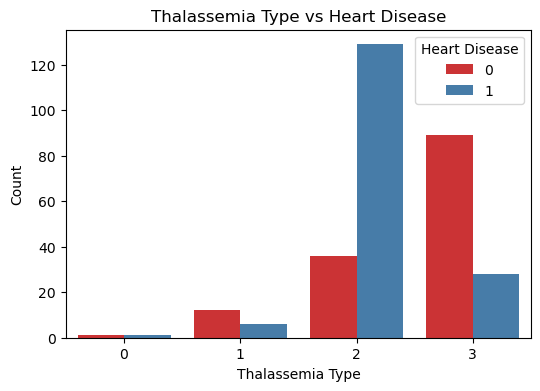

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Step 1: Cholesterol vs. Target
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_cleaned, x='target', y='chol', palette='Set3')
plt.title('Cholesterol Levels vs Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Cholesterol Level (mg/dL)')
plt.show()

# Step 2: Peak Exercise Heart Rate vs Target
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_cleaned, x='target', y='thalach', palette='Set2')
plt.title('Peak Heart Rate vs Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Peak Heart Rate (thalach)')
plt.show()

# Step 3: Thalassemia vs Target
plt.figure(figsize=(6, 4))
sns.countplot(data=df_cleaned, x='thal', hue='target', palette='Set1')
plt.title('Thalassemia Type vs Heart Disease')
plt.xlabel('Thalassemia Type')
plt.ylabel('Count')
plt.legend(title='Heart Disease')
plt.show()



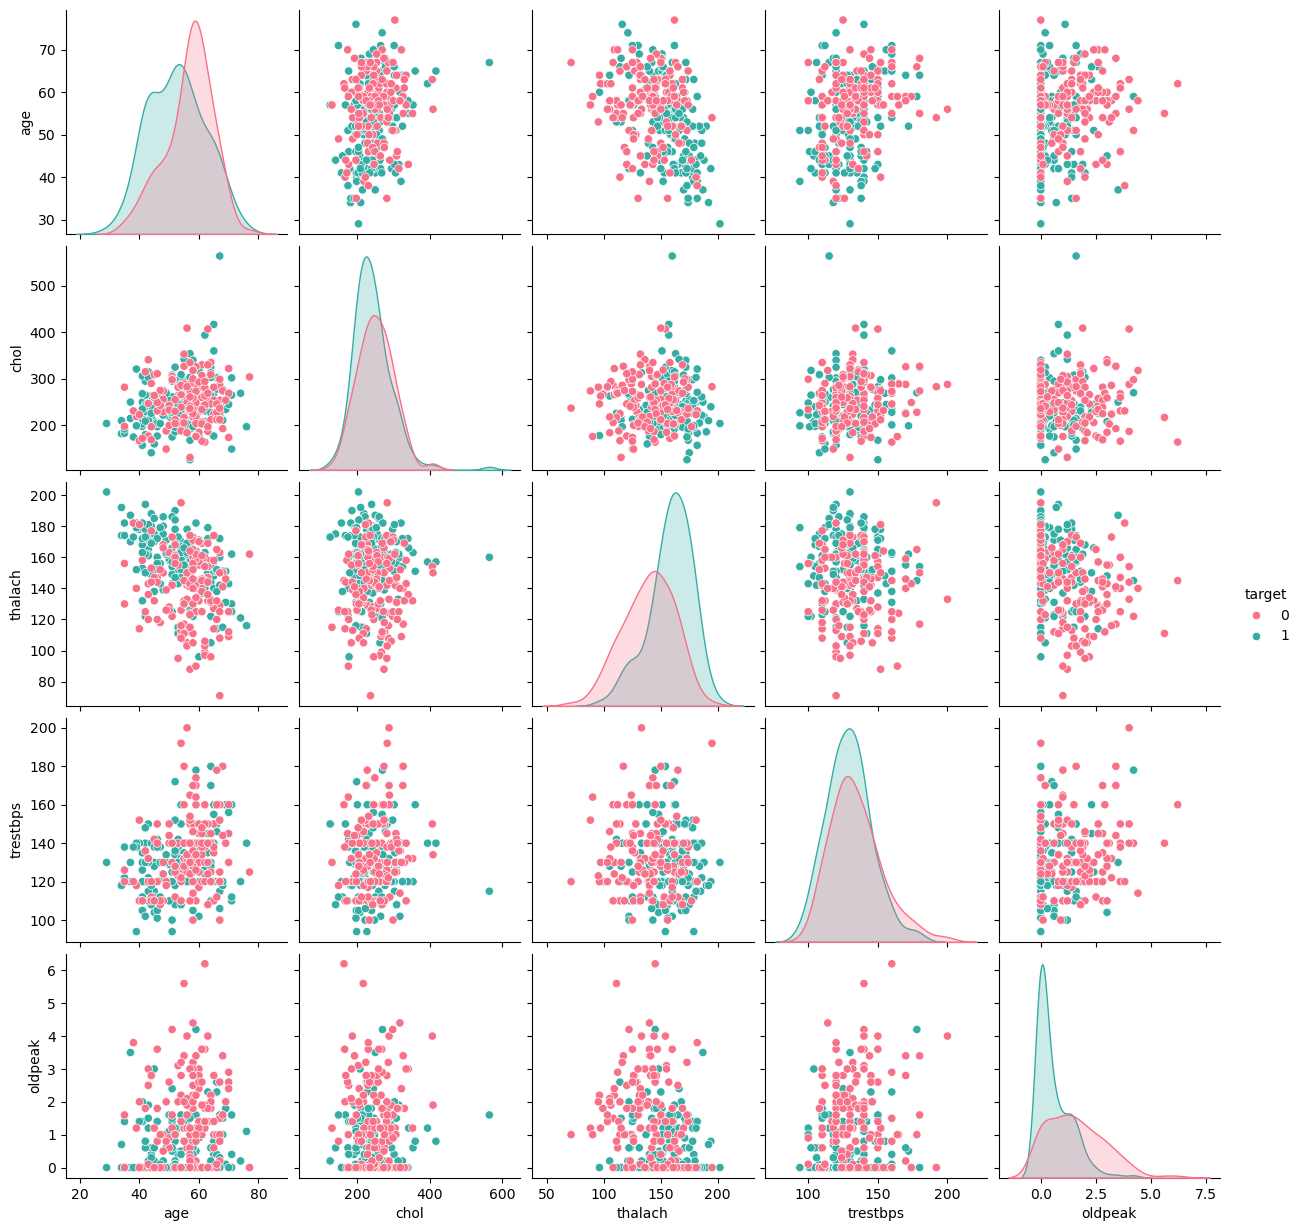

In [70]:
# Ensure selected columns are numeric and clean
#Pairplot to understand the relationship
pairplot_cols = ['age', 'chol', 'thalach', 'trestbps', 'oldpeak', 'target']
df_pair = df_cleaned[pairplot_cols].apply(pd.to_numeric, errors='coerce').dropna()

# Now plot
sns.pairplot(df_pair, hue='target', palette='husl')
plt.show()


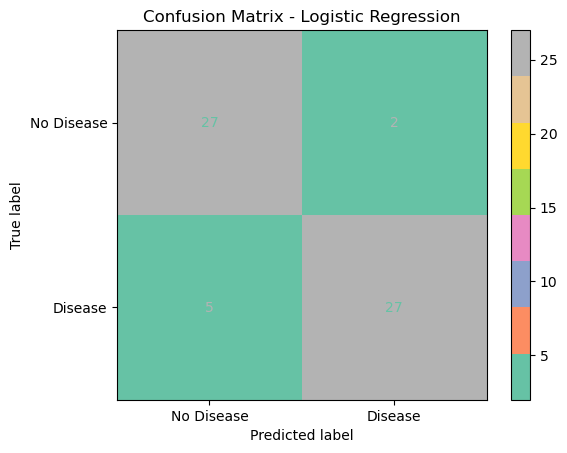

'              precision    recall  f1-score   support\n\n           0       0.84      0.93      0.89        29\n           1       0.93      0.84      0.89        32\n\n    accuracy                           0.89        61\n   macro avg       0.89      0.89      0.89        61\nweighted avg       0.89      0.89      0.89        61\n'

In [74]:
# Step 0: Re-prepare the data
X = df_cleaned.drop('target', axis=1)
y = df_cleaned['target']

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, columns=['cp', 'thal', 'slope', 'restecg', 'ca', 'sex', 'fbs', 'exang'], drop_first=True)

# Step 1: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 3: Logistic Regression
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

# Step 4: Predict
y_pred = model.predict(X_test)

# Step 5: Confusion Matrix & Report
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Display confusion matrix
ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["No Disease", "Disease"]).plot(cmap='Set2')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

report



In [76]:
# Combine the cleaned dataset with original categorical values for Tableau use
df_export = df_cleaned.copy()

# Export to CSV
export_path = "/mnt/data/heart_disease_cleaned.csv"
df_export.to_csv(export_path, index=False)

export_path


'/mnt/data/heart_disease_cleaned.csv'